# Introduction
In this experiment, we did not limit the number of patterns by the number of their occurrence during the day. Here participate 196 patterns. The main change is that the period for assessing price changes here is not a fixed value, but can take one of the values in the range from 5 through 10. Let's compare the results with another experiment, where the number of patterns is significantly limited.

In [1]:
import pandas as pd
import numpy as np
from pickle import load
import matplotlib.pyplot as plt
import os 
os.chdir('../..')

In [2]:
similarity = 90
height, width = 10, 5
window = 10
periods = range(5, 11)

Qmatrix_init = load(open(f'src/SPY_patterns_scanner/output/{similarity}/{width}x{height}/Q_matrix_win{periods[0]}_{periods[-1]}.pkl', 'rb'))
count_cols = [col for col in Qmatrix_init.columns if 'count' in col] 
pl_cols = [col for col in Qmatrix_init.columns if 'pl' in col]

buy_cols = [col for col in Qmatrix_init.columns if 'buy' in col]
hold_cols = [col for col in Qmatrix_init.columns if 'hold' in col]
sell_cols = [col for col in Qmatrix_init.columns if 'sell' in col]

columns_to_show = (['date', 'prototype', 'code']+buy_cols+hold_cols+sell_cols+count_cols+pl_cols).sort()

Qmatrix = Qmatrix_init   # [['date', 'prototype', 'code', 'buy', 'hold', 'sell']+pl_cols]
Qmatrix.head(5)

,date,original_index,prototype,prototype_label,diff,min_price,max_price,all_prices,code,similarity,...,"(iter_8, hold_count)","(iter_8, sell_count)","(iter_8, buy_profit)","(iter_8, buy_loss)","(iter_8, sell_profit)","(iter_8, sell_loss)","(iter_8, buy_profit_count)","(iter_8, buy_loss_count)","(iter_8, sell_profit_count)","(iter_8, sell_loss_count)"
0,2020-01-02 09:30:00.002,0,0,1,0.02,323.54,323.56,"[323.54, 323.56, 323.54, 323.56, 323.54]","[0, 2, 0, 2, 0]",100.0,...,0,52,0.00,0.00,0.56,-0.11,0,0,39,10
1379,2020-01-02 09:30:00.002,1,1,1,0.03,323.54,323.57,"[323.56, 323.54, 323.56, 323.54, 323.57]","[2, 0, 2, 0, 3]",100.0,...,0,0,0.04,-0.01,0.00,0.00,4,1,0,0
1444,2020-01-02 09:30:00.002,2,2,1,0.03,323.54,323.57,"[323.54, 323.56, 323.54, 323.57, 323.56]","[0, 2, 0, 3, 2]",100.0,...,0,0,0.03,-0.02,0.00,0.00,2,2,0,0
1473,2020-01-02 09:30:00.002,3,3,1,0.03,323.54,323.57,"[323.56, 323.54, 323.57, 323.56, 323.57]","[2, 0, 3, 2, 3]",100.0,...,0,0,0.03,-0.01,0.00,0.00,2,1,0,0
1504,2020-01-02 09:30:00.002,4,4,1,0.03,323.54,323.57,"[323.54, 323.57, 323.56, 323.57, 323.56]","[0, 3, 2, 3, 2]",100.0,...,0,26,0.00,0.00,0.18,-0.12,0,0,15,9


### Visualization of learning process. Profit maximization

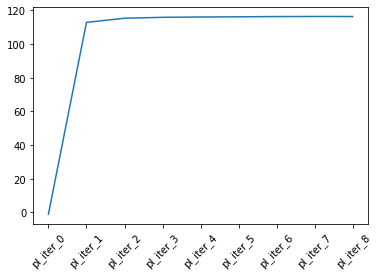

In [3]:
Qmatrix[pl_cols].sum().plot(rot=45);

### Max PL

In [4]:
# max PL
Qmatrix[pl_cols].sum().max()

116.36999999999995

#### Summary
The PL level reached a steady state in almost one iteration, and the second iteration gave another small increase. Further changes are not observed. The maximum PL value is $ 116. This value is 6% lower than the maximum PL for 14 patterns.   

In [5]:
stat_cols = ['buy_count', 'hold_count', 'sell_count',
                             'buy_profit', 'buy_loss', 'sell_profit', 'sell_loss',
                             'buy_profit_count', 'buy_loss_count', 'sell_profit_count', 'sell_loss_count']
iter_number = len(pl_cols)
iter_columns = ['iter_' + str(el) for el in range(iter_number)]

### Count of buys, holds and sells

In [6]:
buys = pd.DataFrame(Qmatrix_init[('iter_1', 'buy_count')])
holds = pd.DataFrame(Qmatrix_init[('iter_1', 'hold_count')])
sells = pd.DataFrame(Qmatrix_init[('iter_1', 'sell_count')])
for iterat in iter_columns[2:]:
    buys = buys.join(Qmatrix_init[(iterat, 'buy_count')])
    holds = holds.join(Qmatrix_init[(iterat, 'hold_count')])
    sells = sells.join(Qmatrix_init[(iterat, 'sell_count')])

In [7]:
total_count_of_actions = {'buys': buys.sum().sum(), 'holds': holds.sum().sum(), 'sells': sells.sum().sum()}

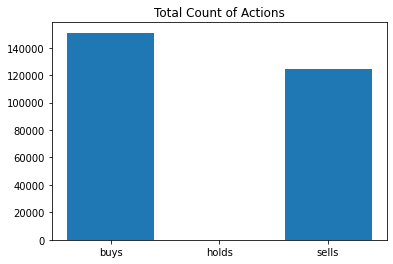

In [8]:
plt.bar(*zip(*total_count_of_actions.items()))
plt.title('Total Count of Actions')
plt.show()

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# ax1.bar(*zip(*total_count_of_actions.items()), width = 0.7)
# ax2.bar(*zip(*total_count_of_actions_1.items()), width = 0.7)
# fig.suptitle('Profit / loss count distributions for BUY and SELL')
# plt.legend([ax1, ax2], ['With 0 teration', 'Without 0 teration'])
# plt.show()

#### Summary
The number of BUYs exceeds the rest of the pattern states. This is not due to the fact that the first random action during model initialization was defined as BUY. It can also be noted that the system of penalties has worked successfully and the patterns do not "sit out" in the HOLD state.

### Profit / loss disribution

In [9]:
buy_profit = pd.DataFrame(Qmatrix_init[('iter_1', 'buy_profit')])
buy_loss = pd.DataFrame(Qmatrix_init[('iter_1', 'buy_loss')])
sell_profit = pd.DataFrame(Qmatrix_init[('iter_1', 'sell_profit')])
sell_loss = pd.DataFrame(Qmatrix_init[('iter_1', 'sell_loss')])
for iterat in iter_columns[2:]:
    buy_profit = buy_profit.join(Qmatrix_init[(iterat, 'buy_profit')])
    buy_loss = buy_loss.join(Qmatrix_init[(iterat, 'buy_loss')])
    sell_profit = sell_profit.join(Qmatrix_init[(iterat, 'sell_profit')])
    sell_loss = sell_loss.join(Qmatrix_init[(iterat, 'sell_loss')])

In [10]:
buy_pl_distribution = {'buy_profit': buy_profit.sum().sum(), 'buy_loss': abs(buy_loss.sum().sum())}
sell_pl_distribution = {'sell_profit': sell_profit.sum().sum(), 'sell_loss': abs(sell_loss.sum().sum())}

In [11]:
# fig, ax = plt.subplots()
# ax.bar(*zip(*buy_pl_distribution.items()), width = 0.7, label='BUY')
# ax.bar(*zip(*sell_pl_distribution.items()), width = 0.7, label='SELL')
# plt.title('Profit / loss distributions for BUY and SELL')
# plt.legend()
# plt.show()

### Count of profit / loss deals

In [12]:
buy_profit_count = pd.DataFrame(Qmatrix_init[('iter_1', 'buy_profit_count')])
buy_loss_count = pd.DataFrame(Qmatrix_init[('iter_1', 'buy_loss_count')])
sell_profit_count = pd.DataFrame(Qmatrix_init[('iter_1', 'sell_profit_count')])
sell_loss_count = pd.DataFrame(Qmatrix_init[('iter_1', 'sell_loss_count')])
for iterat in iter_columns[2:]:
    buy_profit_count = buy_profit_count.join(Qmatrix_init[(iterat, 'buy_profit_count')])
    buy_loss_count = buy_loss_count.join(Qmatrix_init[(iterat, 'buy_loss_count')])
    sell_profit_count = sell_profit_count.join(Qmatrix_init[(iterat, 'sell_profit_count')])
    sell_loss_count = sell_loss_count.join(Qmatrix_init[(iterat, 'sell_loss_count')])

In [13]:
buy_count_distribution = {'buy_profit': buy_profit_count.sum().sum(), 'buy_loss': abs(buy_loss_count.sum().sum())}
sell_count_distribution = {'sell_profit': sell_profit_count.sum().sum(), 'sell_loss': abs(sell_loss_count.sum().sum())}

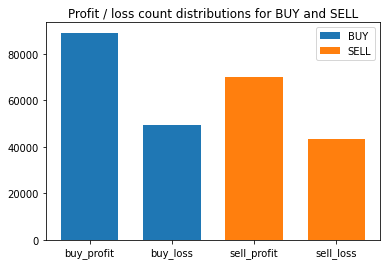

In [14]:
fig, ax = plt.subplots()
ax.bar(*zip(*buy_count_distribution.items()), width = 0.7, label='BUY')
ax.bar(*zip(*sell_count_distribution.items()), width = 0.7, label='SELL')
plt.title('Profit / loss count distributions for BUY and SELL')
plt.legend()
plt.show()

#### Summary
Patterns often choose the BUY state. This indicates an increase in the price of the instrument.

### Mean value for profit and loss

In [15]:
# calculate profit deals count and loss deals count
profit_deals_count = pd.DataFrame(Qmatrix_init[('iter_1', 'buy_profit_count')]).join(Qmatrix_init[('iter_1', 'sell_profit_count')])
loss_deals_count = pd.DataFrame(Qmatrix_init[('iter_1', 'buy_loss_count')]).join(Qmatrix_init[('iter_1', 'sell_loss_count')])
for iterat in iter_columns[2:]:
    profit_deals_count = profit_deals_count.join(Qmatrix_init[(iterat, 'buy_profit_count')]).join(Qmatrix_init[(iterat, 'sell_profit_count')])
    loss_deals_count = loss_deals_count.join(Qmatrix_init[(iterat, 'buy_loss_count')]).join(Qmatrix_init[(iterat, 'sell_loss_count')])

In [16]:
profit = buy_pl_distribution['buy_profit'] + sell_pl_distribution['sell_profit']
loss = buy_pl_distribution['buy_loss'] + sell_pl_distribution['sell_loss']

mean_profit_deal = profit / profit_deals_count.sum().sum()
mean_loss_deal = loss / loss_deals_count.sum().sum()

print(f'Mean_profit_deal: {mean_profit_deal}. \nMean_loss_deal: {mean_loss_deal}.')

Mean_profit_deal: 0.015010330383888755. 
Mean_loss_deal: 0.015775808223309356.


#### Summary
There is practically no difference between the average of a profitable and a losing trade.

## Summary
In conclusion, we can say that the efficiency of 14 patterns turned out to be higher than 196 on 6% when adding agent states of both actions (BUY, HOLD, SELL) and price changes with different periods (5-10). It is difficult to say what is connected with the fact that a simple model with a fixed price change of 5 periods, three states and without initialization showed a higher result. Perhaps cross-validation will answer this question.